The data set given for the assignment is from "https://archive-beta.ics.uci.edu/ml/datasets/productivity+prediction+of+garment+employees" 
and is cited as Productivity Prediction of Garment Employees. (2020). UCI Machine Learning Repository. 
The data file is attached as csv file. The following are details being provided . The data contains details on actual productivty of a garment industry, the data has been recorded on a day to day basis from the year 2015 to almost year end of 2015. The data set at first needs to be examined and the structure of the data set needs to be understood. The data has been recorded in terms of the following details
Date 
Quarter (Four Quarters)
Department (Sewing and Finishing)
Day (Please note the way data is recorded is that based on a dept and productivity is recorded for various lines in each dept, hence you would find multiple productivity recorded for each combination of vairables such as team, dept, smv, date)
Team 
Targeted_Producitivity (Target which needs to be achieved)
SMV (Standard Minute Value) : Standard time for a Task in this case you can take standard time to complete a garment 
WIP (Work in progress)
Over_time
Incentive 
Idle_time
Idle_men (Idle workers)
no_of_style_change
no_of_workers
Actual_Producitivity

The aim is of this assignment is to obtain an understanding of the data and decipher the relationship among the variables, understanding what possible variables can affect producivity which can be whether overtime or team size or number of worker or department type or a day (like monday ect...) ect.. have an effect. 

Suppose the manager is interested in the following questions 
1. Basic Summary statistics of the data for the numerical variables 
2. basic Summary of the data for the number of working days, count of quarters in the year
3. Mean and standard deviation of actual producivity for every quarter and Histogram plot of actual productivity based on every quarter and conclusion accordingly
4. Number count for sewing and finishing department 
5. Mean and standard deviation of actual producivity for sewing and finishing Histogram plot of actual productivity based on both department and conclusion accordingly
6. Number count for  teams, smv across the year
7. Histogram plot of actual productivity based on all working days, team size and Conclude accordingly 
8. Find correlation matrix and draw heat map for all variables
9. Conclude (Is the company able to meet target, are they giving incentives based on producitivity, does overtime have any effect on productivity)
10. Find the correlation between actual and target productivity for every quarter and for every department. What do you conclude
11. Test using Z test (take a random sample of more than 30 and assume sigma =.1) whether the finishing department has achieved more acheived producitivity than .75 for a standard deviation of .1. State your null and alternative hypothesis. alpha value is .05

12. Test using Z test(take a random sample of more than 30 and assume sigma =.1) whether the sewing department has achieved more producitivit than .75 for a standard deviation of .1. State your null and alternative hypothesis. alpha value is .05.

13. Conduct a two sample t test (take a random sample more than 30) to check whether the finishing department has achieved more actual productivtiy than sewing     department. State your null and alternative hypothesis 

14. Conduct a two sample t (take a random sample less than 30) test to check whether the finishing department has achieved obtained higher incentive than sewing department, state your null and alternative hypothesis. In case test fails for normality check, then take a sample more than 30. 

15. Conduct an ANOVA for comparing productivity for Quarter1, Quarter2, Quarter3, Quarter 4 and accordingly conclude (Assume data is normally distributed)

16. The manager has asked you to classifiy low productivity as less than .5, medium between .5 and less than .75 and higher
    as greater than or equal to .75. He believes that the percentage of  actual producvity  in  sewing departemnt for   
    person classified as low is 30%, for medium is 40% and for high is 30%. USing chi square test can you prove whether his 
    hypothesis is right or not 


In [2]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import scipy.stats as stats
import statsmodels.api as sm
from scipy.stats import f_oneway

In [3]:
#Import Dataset
df=pd.read_csv('garments_worker_productivity.csv')

In [4]:
df.head()

,date,quarter,department,day,team,targeted_productivity,smv,wip,over_time,incentive,idle_time,idle_men,no_of_style_change,no_of_workers,actual_productivity
0,01-01-2015,Quarter1,sewing,Thursday,8,0.80,26.16,1108.0,7080,98,0.0,0,0,59.0,0.940725
1,01-01-2015,Quarter1,finishing,Thursday,1,0.75,3.94,NaN,960,0,0.0,0,0,8.0,0.886500
2,01-01-2015,Quarter1,sewing,Thursday,11,0.80,11.41,968.0,3660,50,0.0,0,0,30.5,0.800570
3,01-01-2015,Quarter1,sewing,Thursday,12,0.80,11.41,968.0,3660,50,0.0,0,0,30.5,0.800570
4,01-01-2015,Quarter1,sewing,Thursday,6,0.80,25.90,1170.0,1920,50,0.0,0,0,56.0,0.800382


In [5]:
df.shape

(1197, 15)

In [6]:
df.dtypes

date                      object
quarter                   object
department                object
day                       object
team                       int64
targeted_productivity    float64
smv                      float64
wip                      float64
over_time                  int64
incentive                  int64
idle_time                float64
idle_men                   int64
no_of_style_change         int64
no_of_workers            float64
actual_productivity      float64
dtype: object

#  Basic Summary statistics of the data for the numerical variable

In [7]:
df.describe()

,team,targeted_productivity,smv,wip,over_time,incentive,idle_time,idle_men,no_of_style_change,no_of_workers,actual_productivity
count,1197.000000,1197.000000,1197.000000,691.000000,1197.000000,1197.000000,1197.000000,1197.000000,1197.000000,1197.000000,1197.000000
mean,6.426901,0.729632,15.062172,1190.465991,4567.460317,38.210526,0.730159,0.369256,0.150376,34.609858,0.735091
std,3.463963,0.097891,10.943219,1837.455001,3348.823563,160.182643,12.709757,3.268987,0.427848,22.197687,0.174488
min,1.000000,0.070000,2.900000,7.000000,0.000000,0.000000,0.000000,0.000000,0.000000,2.000000,0.233705
25%,3.000000,0.700000,3.940000,774.500000,1440.000000,0.000000,0.000000,0.000000,0.000000,9.000000,0.650307
50%,6.000000,0.750000,15.260000,1039.000000,3960.000000,0.000000,0.000000,0.000000,0.000000,34.000000,0.773333
75%,9.000000,0.800000,24.260000,1252.500000,6960.000000,50.000000,0.000000,0.000000,0.000000,57.000000,0.850253
max,12.000000,0.800000,54.560000,23122.000000,25920.000000,3600.000000,300.000000,45.000000,2.000000,89.000000,1.120437


 # basic Summary of the data for the number of working days, count of quarters in the year

In [8]:
workingdays_quarters=df.groupby('quarter')['day'].describe()

print(workingdays_quarters)

         count unique        top freq
quarter                              
Quarter1   360      6    Tuesday   62
Quarter2   335      6     Sunday   64
Quarter3   210      6  Wednesday   40
Quarter4   248      6   Saturday   44
Quarter5    44      2   Saturday   24


# Mean and standard deviation of actual producivity for every quarter and   
#  Histogram plot of actual productivity based on every quarter and conclusion accordingly

In [9]:
df.groupby('quarter')['actual_productivity'].mean()


quarter
Quarter1    0.751560
Quarter2    0.743710
Quarter3    0.704759
Quarter4    0.709067
Quarter5    0.826177
Name: actual_productivity, dtype: float64

<Axes: xlabel='actual_productivity', ylabel='Count'>

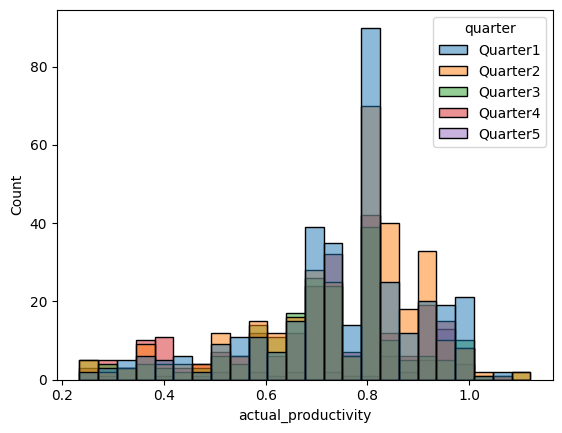

In [10]:
sns.histplot(data=df,x=df['actual_productivity'], hue=df['quarter'])

 # Number count for sewing and finishing department

In [14]:
sewing_count=df[df['department']=='sewing']['department'].count()
print("Sewing Count: \n",sewing_count)

finishing_count=df[df['department']=='finishing']['department'].count()
print("Finishing Count:\n ",finishing_count)

Sewing Count: 
 691
Finishing Count:
  506


# Mean and standard deviation of actual producivity for sewing and finishing Histogram plot of actual productivity  based on both department and conclusion accordingly

In [31]:
mean_actual_productivity_sewing=df[df['department']=='sewing']['actual_productivity'].mean()
print("Mean of Actual Productivity for Sewing: ",mean_actual_productivity_sewing)

std_actual_productivity_sewing=df[df['department']=='sewing']['actual_productivity'].std()
print("\nStandard Deviation of Actual Productivity for Sewing: ",std_actual_productivity_sewing)


mean_actual_productivity_finishing=df[df['department']=='finishing']['actual_productivity'].mean()
print("\nMean of Actual Productivity for Finishing: ",mean_actual_productivity_finishing)


std_actual_productivity_finishing=df[df['department']=='finishing']['actual_productivity'].std()
print("\nStandard Deviation of Actual Productivity for Finishing: ",std_actual_productivity_finishing)

Mean of Actual Productivity for Sewing:  0.7220130317105644

Standard Deviation of Actual Productivity for Sewing:  0.15478432010106713

Mean of Actual Productivity for Finishing:  0.7529506683241106

Standard Deviation of Actual Productivity for Finishing:  0.1970209830649775


# Number count for each teams, smv across the year

In [50]:
df['date'] = pd.to_datetime(df['date'], errors='coerce')

df['year']= df['date'].dt.year

team_count=df.groupby(['year','team']).size()
print("team Count across the year: \n", team_count)

team Count across the year: 
 year    team
2015.0  1       62
        2       60
        3       49
        4       58
        5       45
        6       47
        7       51
        8       58
        9       57
        10      51
        11      46
        12      51
dtype: int64


In [47]:
smv_count=df.groupby(['year','smv']).size()
print("smv Count across the year: \n", smv_count)

smv Count across the year: 
 year    smv  
2015.0  2.90      59
        3.90      16
        3.94     108
        4.08      11
        4.15      39
        4.30       5
        4.60      31
        10.05      6
        11.41     18
        11.61     15
        12.52      4
        15.26     21
        15.28      3
        16.10      5
        18.79     24
        19.31      5
        19.87     10
        20.10      1
        20.20      1
        20.55      1
        20.79      3
        21.82     10
        21.98      3
        22.40      1
        22.52     45
        22.53      1
        22.94      2
        23.41      5
        23.69      2
        24.26     13
        25.31      1
        25.90     20
        26.16     19
        26.66      6
        26.82     18
        27.48      6
        28.08     27
        29.12     11
        29.40     10
        30.10     36
        30.33      1
        30.48      7
        31.83      1
        42.41      1
        45.67      1
        50.4

 # Histogram plot of actual productivity based on all working days, team size

<Axes: xlabel='actual_productivity', ylabel='Count'>

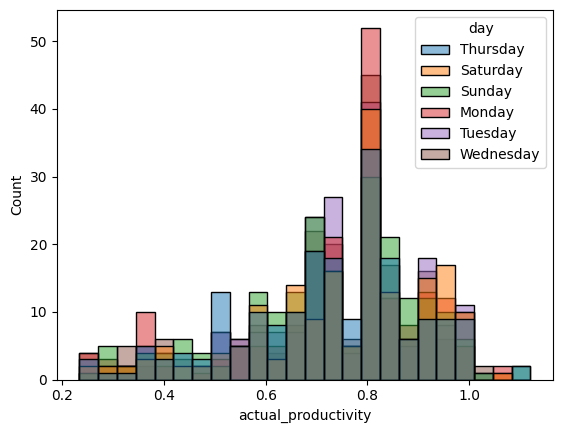

In [27]:
sns.histplot(data=df,x=df['actual_productivity'], hue=df['day'])

# Find correlation matrix and draw heat map for all variables

Correlation Matrix:
                        targeted_productivity       smv       wip  over_time  \
targeted_productivity               1.000000 -0.069489  0.062054  -0.088557   
smv                                -0.069489  1.000000 -0.037837   0.674887   
wip                                 0.062054 -0.037837  1.000000   0.022302   
over_time                          -0.088557  0.674887  0.022302   1.000000   
incentive                           0.032768  0.032629  0.167210  -0.004793   
idle_time                          -0.056181  0.056863 -0.026299   0.031038   
idle_men                           -0.053818  0.105901 -0.048718  -0.017913   
no_of_style_change                 -0.209294  0.315388 -0.072357   0.059790   
no_of_workers                      -0.084288  0.912176  0.030383   0.734164   
actual_productivity                 0.421594 -0.122089  0.131147  -0.054206   

                       incentive  idle_time  idle_men  no_of_style_change  \
targeted_productivity   0.032768

<Axes: >

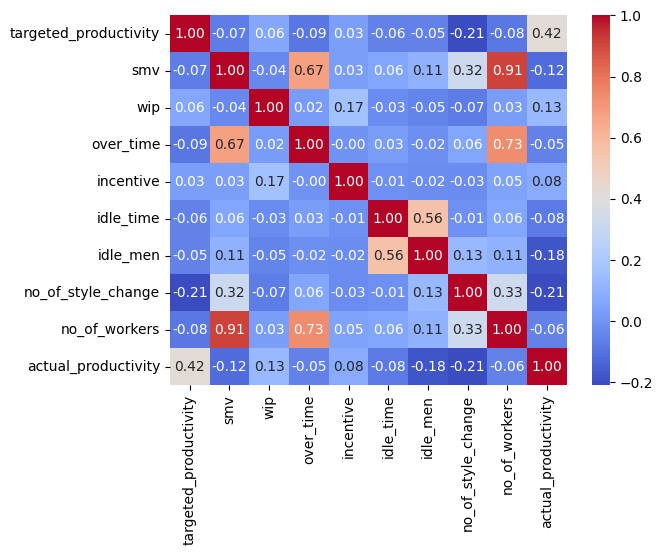

In [82]:

df_new=df.drop(['date','quarter','department','day','team','year'],axis=1)

corr_matrix = df_new.corr()

print("Correlation Matrix:\n",corr_matrix)

print("\n\nHeat Map:\n")
sns.heatmap(corr_matrix, annot=True, cmap='coolwarm', fmt=".2f")


# Conclude (Is the company able to meet target, are they giving incentives based on producitivity, does overtime have any effect on productivity)

In [83]:
print("There no significant correlation between actual , targeted prodcutivity with incentives.")
print("There no significant correlation between actual , targeted prodcutivity with overtime.")

There no significant correlation between actual , targeted prodcutivity with incentives

There no significant correlation between actual , targeted prodcutivity with overtime



# Find the correlation between actual and target productivity for every quarter and for every department. 
# What do you conclude

In [84]:
print("There is no high correlation between actual productivity and target productivity.")
print("Therefore we can conclude that the company is not able to meet the target.")

There is no high correlation between actual productivity and target productivity.
Therefore we can conclude that the company is not able to meet the target.


11. Test using Z test (take a random sample of more than 30 and assume sigma =.1) whether the finishing department has achieved more acheived producitivity than .75 for a standard deviation of .1. State your null and alternative hypothesis. alpha value is .05

12. Test using Z test(take a random sample of more than 30 and assume sigma =.1) whether the sewing department has achieved more producitivit than .75 for a standard deviation of .1. State your null and alternative hypothesis. alpha value is .05.

13. Conduct a two sample t test (take a random sample more than 30) to check whether the finishing department has achieved more actual productivtiy than sewing     department. State your null and alternative hypothesis 

14. Conduct a two sample t (take a random sample less than 30) test to check whether the finishing department has achieved obtained higher incentive than sewing department, state your null and alternative hypothesis. In case test fails for normality check, then take a sample more than 30. 

15. Conduct an ANOVA for comparing productivity for Quarter1, Quarter2, Quarter3, Quarter 4 and accordingly conclude (Assume data is normally distributed)

16. The manager has asked you to classifiy low productivity as less than .5, medium between .5 and less than .75 and higher
    as greater than or equal to .75. He believes that the percentage of  actual producvity  in  sewing departemnt for   
    person classified as low is 30%, for medium is 40% and for high is 30%. USing chi square test can you prove whether his 
    hypothesis is right or not 

In [ ]:
#11
sigma =.1
alpha value is .05

#H0: Finishing Department has achieved mean productivity > 0.75
#H1: Finishing Department has achieved mean productivity <= 0.75



In [ ]:
#12

In [ ]:
#13

In [ ]:
#14

In [ ]:
#15

In [ ]:
#16